In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import pandas as pd
import random

In [62]:
df = pd.read_csv('adult11.csv')
df = df.head(50)

In [64]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [134]:
df['salary_binary'] = df['salary'].map({'<=50K': 0, '>50K': 1})

Линейная регрессия: X * W + B

In [137]:
def linear_regression(df, weights, bias):
    results = []
    for row in df:
        result = sum(x * w for x, w in zip(row, weights)) + bias
        results.append(result)
    return results

Сигмоида

In [140]:
def activation_func(x):
    return [1 / (1 + (math.e ** -i)) for i in x]

Производная сигмоиды

In [143]:
def activation_derivative(x):
    return [i * (1 - i) for i in x]

Нейрончик

In [146]:
def neuron(df, weights, bias):
    temp_result = linear_regression(df, weights, bias)
    result = activation_func(temp_result)
    return result

Обучение: градиентный спуск

In [149]:
def train(df, labels, epochs=5000, lr=0.1):
    random.seed(1)
    weights = [random.random() for _ in df[0]]
    bias = random.random()
    for _ in range(epochs):
        output = neuron(df, weights, bias)
        error = [y - y_pred for y, y_pred in zip(labels, output)]
        for i in range(len(weights)):
            gradient = sum(e * activation_derivative(output)[j] * df[j][i] for j, e in enumerate(error))
            weights[i] += lr * gradient
        bias += lr * sum(e * activation_derivative(output)[j] for j, e in enumerate(error))

    return weights, bias

Данные(XOR-пример)

In [152]:
X = df[['age', 'hours-per-week', 'education-num']].values
Y = df['salary_binary'].values

Обучение модели

In [155]:
weights, bias = train(X.tolist(), Y.tolist())
print("Обученные веса:", weights)
print("Обученный bias:", bias)

Обученные веса: [0.1337083434833312, 0.8473660737206193, 0.7637359070800638]
Обученный bias: 0.2550593493849255


Предсказание

In [157]:
predictions = neuron(X.tolist(), weights, bias)
print("Предсказания:", predictions)

Предсказания: [1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999993, 1.0, 1.0, 1.0, 0.9999999951175691, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999838, 1.0, 0.9999999999997515, 1.0, 1.0, 1.0, 0.9999999850894998, 1.0, 1.0, 1.0, 0.9999999999981533, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999991611, 1.0]


тут проверочка почему числа такие отвратительные(сам код работает, но для данного датафрейма не особенно)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

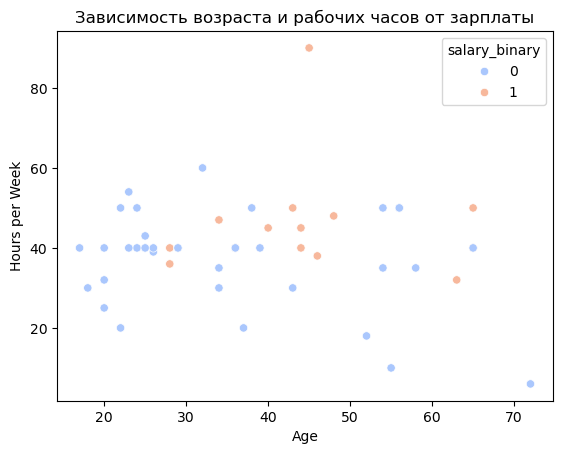

In [132]:
sns.scatterplot(x='age', y='hours-per-week', hue='salary_binary', data=df, palette='coolwarm')
plt.title('Зависимость возраста и рабочих часов от зарплаты')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()